#Supermarket Sales

## Latar belakang 



latar belakang mini project saya kali ini adalah untuk mengetahui cabang supermarket mana yang memiliki pendapatan kotor paling tinggi diantara yang lain.

##Pertanyaan Analis


Cabang supermarket mana yang memiliki pendapatan kotor paling tinggi?

##EDA (Exploratory Data Analysis)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv('/content/supermarket_sales - Sheet1.csv')

In [4]:
df= df.set_index('Invoice ID')

In [5]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
df.tail()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [7]:
df.shape

(1000, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 750-67-8428 to 849-09-3807
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross income

In [9]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [10]:
df_revenue_by_gender = df.groupby('Gender').agg([np.median, np.mean, sum])
df_revenue_by_gender.T

Gender                                 Female           Male
Unit price              median      54.070000      56.500000
                        mean        55.263952      56.081944
                        sum      27687.240000   27984.890000
Quantity                median       6.000000       5.000000
                        mean         5.726547       5.292585
                        sum       2869.000000    2641.000000
Tax 5%                  median      12.980000      11.630000
                        mean        15.956936      14.799487
                        sum       7994.425000    7384.944000
Total                   median     272.580000     244.230000
                        mean       335.095659     310.789226
                        sum     167882.925000  155083.824000
cogs                    median     259.600000     232.600000
                        mean       319.138723     295.989739
                        sum     159888.500000  147698.880000
gross margin percentage median       4.761905       4.761905
                        mean         4.761905       4.761905
                        sum       2385.714286    2376.190476
gross income            median      12.980000      11.630000
                        mean        15.956936      14.799487
                        sum       7994.425000    7384.944000
Rating                  median       7.100000       6.900000
                        mean         6.964471       6.980962
                        sum       3489.200000    3483.500000

In [11]:
df_revenue_by_customertype = df.groupby('Customer type').agg([np.mean, np.median, sum])
df_revenue_by_customertype.T

Customer type                          Member         Normal
Unit price              mean        56.206986      55.135130
                        median      56.040000      54.280000
                        sum      28159.700000   27512.430000
Quantity                mean         5.558882       5.460922
                        median       5.000000       5.000000
                        sum       2785.000000    2725.000000
Tax 5%                  mean        15.609110      15.148707
                        median      12.668000      11.306000
                        sum       7820.164000    7559.205000
Total                   mean       327.791305     318.122856
                        median     266.028000     237.426000
                        sum     164223.444000  158743.305000
cogs                    mean       312.182196     302.974148
                        median     253.360000     226.120000
                        sum     156403.280000  151184.100000
gross margin percentage mean         4.761905       4.761905
                        median       4.761905       4.761905
                        sum       2385.714286    2376.190476
gross income            mean        15.609110      15.148707
                        median      12.668000      11.306000
                        sum       7820.164000    7559.205000
Rating                  mean         6.940319       7.005210
                        median       7.000000       7.000000
                        sum       3477.100000    3495.600000

##Data Preparation 

In [12]:
results = df.groupby('Branch').sum()
results

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Branch,,,,,,,,
A,18625.49,1859,5057.1605,106200.3705,101143.21,1619.047619,5057.1605,2389.2
B,18478.88,1820,5057.0320,106197.6720,101140.64,1580.952381,5057.0320,2263.6
C,18567.76,1831,5265.1765,110568.7065,105303.53,1561.904762,5265.1765,2319.9


##Data Visualization

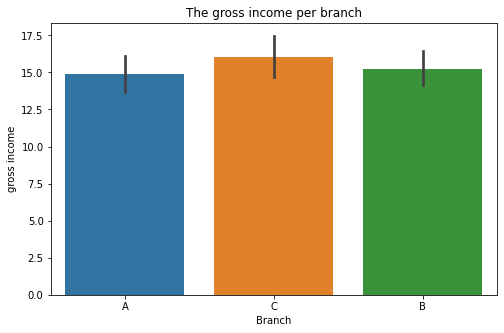

In [13]:
plt.figure(figsize=(8,5))
plt.title('The gross income per branch')
sns.barplot(x=df['Branch'], y=df['gross income'])
plt.show()